In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
star_wars = pd.read_csv('star_wars.csv', encoding = 'ISO-8859-1')

In [3]:
df = star_wars

In [4]:
df.head(2)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic


In [5]:
df.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [6]:
df = df[pd.notnull(df['RespondentID'])]

In [7]:
df['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [8]:
df['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()

Yes    552
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [9]:
yes_no = {'Yes': True, 'No': False}

In [10]:
cols = [
    'Have you seen any of the 6 films in the Star Wars franchise?',
    'Do you consider yourself to be a fan of the Star Wars film franchise?'
]

for col in cols:
    df[col] = df[col].map(yes_no)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [11]:
movie_cols = ['Which of the following Star Wars films have you seen? Please select all that apply.',
              'Unnamed: 4',
              'Unnamed: 5',
              'Unnamed: 6',
              'Unnamed: 7',
              'Unnamed: 8'
]

for movie in movie_cols:
    print(df[movie].value_counts())

Star Wars: Episode I  The Phantom Menace    673
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64
Star Wars: Episode II  Attack of the Clones    571
Name: Unnamed: 4, dtype: int64
Star Wars: Episode III  Revenge of the Sith    550
Name: Unnamed: 5, dtype: int64
Star Wars: Episode IV  A New Hope    607
Name: Unnamed: 6, dtype: int64
Star Wars: Episode V The Empire Strikes Back    758
Name: Unnamed: 7, dtype: int64
Star Wars: Episode VI Return of the Jedi    738
Name: Unnamed: 8, dtype: int64


In [12]:
movie_map = {
    'Star Wars: Episode I  The Phantom Menace': True,
    'Star Wars: Episode II  Attack of the Clones': True,
    'Star Wars: Episode III  Revenge of the Sith': True,
    'Star Wars: Episode IV  A New Hope': True,
    'Star Wars: Episode V The Empire Strikes Back': True,
    'Star Wars: Episode VI Return of the Jedi': True,
    np.nan: False
    }

In [13]:
for movie in movie_cols:
    df[movie] = df[movie].map(movie_map)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [14]:
for i in range(len(movie_cols)):
    print(df[movie_cols[i]].value_counts()) 

True     673
False    513
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64
False    615
True     571
Name: Unnamed: 4, dtype: int64
False    636
True     550
Name: Unnamed: 5, dtype: int64
True     607
False    579
Name: Unnamed: 6, dtype: int64
True     758
False    428
Name: Unnamed: 7, dtype: int64
True     738
False    448
Name: Unnamed: 8, dtype: int64


In [15]:
counter = 1

for movie in movie_cols:
    movie_label = 'seen_movie_' + str(counter)
    df[movie_label] = df[movie]
    df = df.drop(movie, 1)
    counter += 1

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [16]:
df[df.columns[3:9]] = df[df.columns[3:9]].astype(float)

In [17]:
# Change the names of the "Rank Movie" questions

counter = 1

for i in range(3, 9):
    movie_label = 'rank_movie_' + str(counter)
    column_label = str(df.columns[i])
    df.rename(columns = {column_label: movie_label}, inplace = True)
    counter += 1

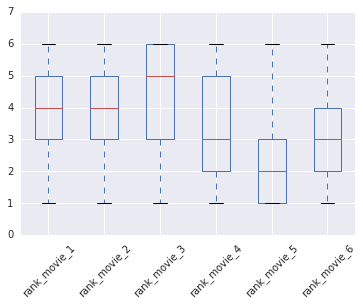

In [18]:
df[['rank_movie_1',
    'rank_movie_2',
    'rank_movie_3',
    'rank_movie_4',
    'rank_movie_5',
    'rank_movie_6']].plot(kind = 'box',
                          rot = 45,
                          ylim = (0, 7));

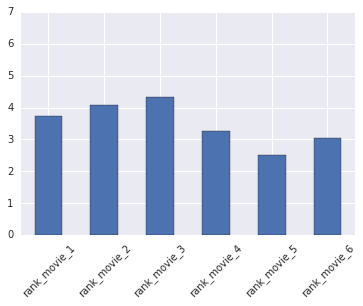

In [19]:
df[['rank_movie_1',
    'rank_movie_2',
    'rank_movie_3',
    'rank_movie_4',
    'rank_movie_5',
    'rank_movie_6']].mean().plot(kind = 'bar',
                                 rot = 45,
                                 ylim = (0, 7));

In [20]:
df.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'rank_movie_1', 'rank_movie_2', 'rank_movie_3', 'rank_movie_4',
       'rank_movie_5', 'rank_movie_6',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)', 'seen_movie_1', 'seen_movie_2',
       'se

In [21]:
binary_cols = [df.columns[2], df.columns[26], df.columns[27]]

In [22]:
binary_cols

['Do you consider yourself to be a fan of the Star Wars film franchise?',
 'Do you consider yourself to be a fan of the Star Trek franchise?',
 'Gender']

In [42]:
# create dfs for star wars fans and non-fans
star_wars_fans = df[df[binary_cols[0]] == True]
not_star_wars_fans = df[df[binary_cols[0]] == False]

# create dfs for star trek fans and non-fans
star_trek_fans = df[df[binary_cols[1]] == 'Yes']
not_star_trek_fans = df[df[binary_cols[1]] == 'No']

# create dfs for males and females
males = df[df[binary_cols[2]] == 'Male']
females = df[df[binary_cols[2]] == 'Female']

In [24]:
def movie_rank_boxplot(df):
    df[['rank_movie_1',
    'rank_movie_2',
    'rank_movie_3',
    'rank_movie_4',
    'rank_movie_5',
    'rank_movie_6']].plot(kind = 'box',
                          rot = 45,
                          ylim = (0, 7));

def movie_rank_bar(df):
    df[['rank_movie_1',
    'rank_movie_2',
    'rank_movie_3',
    'rank_movie_4',
    'rank_movie_5',
    'rank_movie_6']].mean().plot(kind = 'bar',
                                 rot = 45,
                                 ylim = (0, 7));

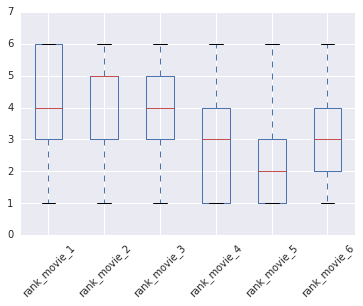

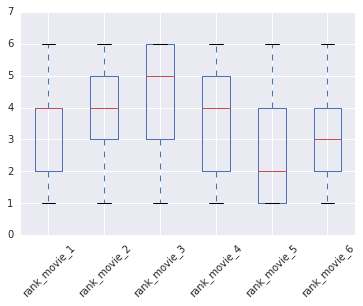

In [25]:
movie_rank_boxplot(males);
movie_rank_boxplot(females);

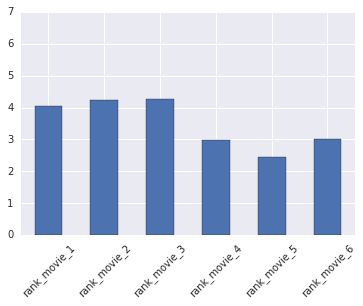

In [26]:
movie_rank_bar(males);

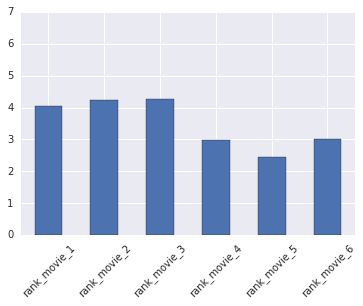

In [27]:
movie_rank_bar(males);

In [28]:
clean_movie_rank_cols = ['rank_movie_1',
                         'rank_movie_2',
                         'rank_movie_3',
                         'rank_movie_4',
                         'rank_movie_5',
                         'rank_movie_6']

clean_seen_movie_cols = ['seen_movie_1',
                         'seen_movie_2',
                         'seen_movie_3',
                         'seen_movie_4',
                         'seen_movie_5',
                         'seen_movie_6',]

In [29]:
def binary_bar(df1, df2, col_list, labels = ['label_1', 'label_2'], mean = False):
    
    # return Series objects of each df's means
    if mean:
        
        ser1 = df1[col_list].mean()
        ser2 = df2[col_list].mean()
    
    # return Series of each df
    else:
        
        ser1 = df1[col_list].sum()
        ser2 = df2[col_list].sum()
    
    # aggregate the two Series objects
    avg_concat_df = pd.concat([ser1, ser2], axis = 1)
    
    # rename the columns so that they have the correct labels
    avg_concat_df.rename(columns = {0: labels[0], 1: labels[1]}, inplace = True)
    
    # return chart
    avg_concat_df.plot(kind = 'bar', rot = 45);

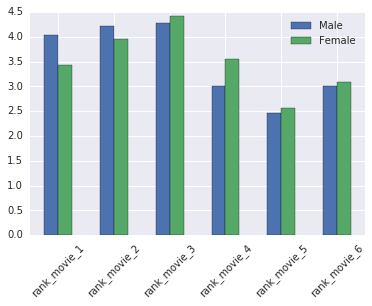

In [34]:
binary_bar(males,
           females,
           clean_movie_rank_cols, labels = ['Male', 'Female'],
           mean = True)

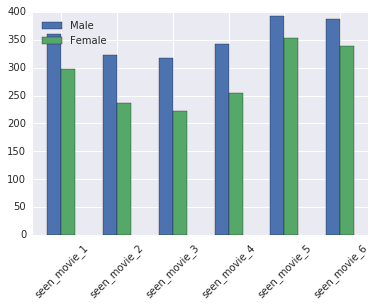

In [35]:
binary_bar(males,
           females,
           clean_seen_movie_cols,
           labels = ['Male', 'Female'])

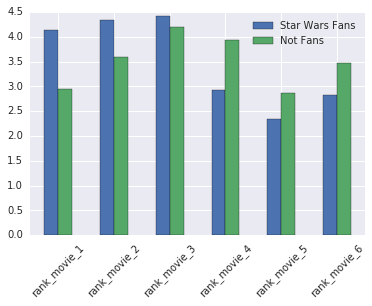

In [36]:
binary_bar(star_wars_fans,
           not_star_wars_fans,
           clean_movie_rank_cols,
           labels = ['Star Wars Fans', 'Not Fans'],
           mean = True)

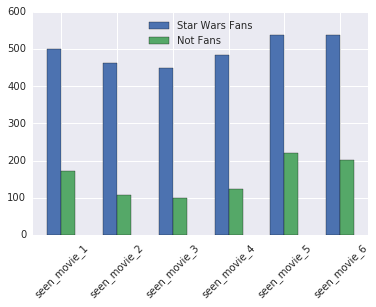

In [37]:
binary_bar(star_wars_fans,
           not_star_wars_fans,
           clean_seen_movie_cols,
           labels = ['Star Wars Fans', 'Not Fans'])

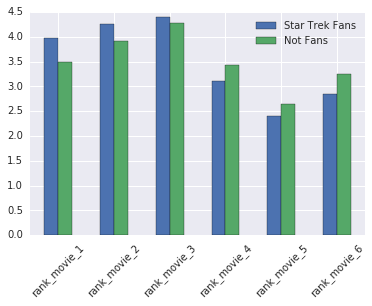

In [44]:
binary_bar(star_trek_fans,
           not_star_trek_fans,
           clean_movie_rank_cols,
           labels = ['Star Trek Fans', 'Not Fans'],
           mean = True)

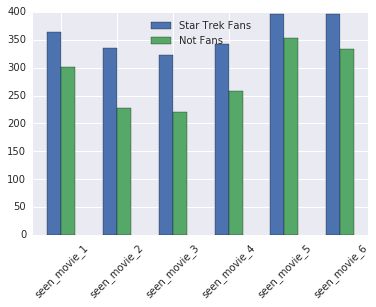

In [45]:
binary_bar(star_trek_fans,
           not_star_trek_fans,
           clean_seen_movie_cols,
           labels = ['Star Trek Fans', 'Not Fans'])

In [46]:
df.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'rank_movie_1', 'rank_movie_2', 'rank_movie_3', 'rank_movie_4',
       'rank_movie_5', 'rank_movie_6',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)', 'seen_movie_1', 'seen_movie_2',
       'se

In [49]:
df['Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.']

1                                    Very favorably
2                                               NaN
3                                Somewhat favorably
4                                    Very favorably
5                                    Very favorably
6                                    Very favorably
7                                    Very favorably
8                                    Very favorably
9                                    Very favorably
10      Neither favorably nor unfavorably (neutral)
11                                              NaN
12                                              NaN
13                               Somewhat favorably
14                                   Very favorably
15                               Somewhat favorably
16                                   Very favorably
17      Neither favorably nor unfavorably (neutral)
18                                   Very favorably
19                                   Very favorably
20          